![](/home/ubuntu/CmsOpenData/AnalysisDesigner/datafiles/cms.png)
 
<p style="margin-right:8%; margin-left:8%; font-size:28px; font-weight: 200; line-height: 1.5em">
# Start an Analysis in Experimental Particle Physics (3) 

## Part 3: Measure of the Z-boson mass and decay width.



* ### Fitting the Z mass peak

Now you have selected in the Tutorial 2.2, those pairs of muons compatibles with a Z-boson, you can perfor a statistical analysis to measure the Z mass and decay width. 

All code you are going to need is provided in Analyzer_Package, so you can access it as many times as you need. We have implemented two different functions usually used for fitting the Z mass peak: a Gaussian and a Breit-Weigner. 

* [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution) distribution:

$$ G(x;\mu,\sigma) = \dfrac{1}{\sqrt{2\pi}\sigma}\exp[-\dfrac{(x-\mu)^{2}}{2\sigma^{2}}]    $$

* [Relativistic Breit-Wigner](https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution) distribution:

$$ B(m;M,\Gamma)= N * \dfrac{2}{\pi}*\dfrac{\Gamma^{2}M^{2}}{(m^{2}-M^{2})^{2} + m^{4}(\Gamma^{2}/M^{2})}   $$

To fit a generator-level Z peak a Breit-Wigner fit makes sense. However, reconstructed-level Z peaks have many detector resolutions that smear the Z mass peak. If the detector resolution is relatively poor, then it is usually good enough to fit a gaussian (since the gaussian detector resolution will overwhelm the inherent Briet-Wigner shape of the peak). If the detector resolution is fairly good, then another option is to fit a Breit-Wigner (for the inherent shape) convoluted with a gaussian (to describe the detector effects).This is in the "no-background" case. If you have backgrounds in your sample (Drell-Yan, cosmics, etc...), and you want to do the fit over a large mass range, then another function needs to be included to take care of this - an exponential is commonly used. 
 
**NOTE:** 

For each exercise, to run the code is necessary import **ROOT**.


In [ ]:
# Import ROOT
import ROOT

In [ ]:
cd ~/CmsOpenData/AnalysisDesigner

* ## Gaussian Fit

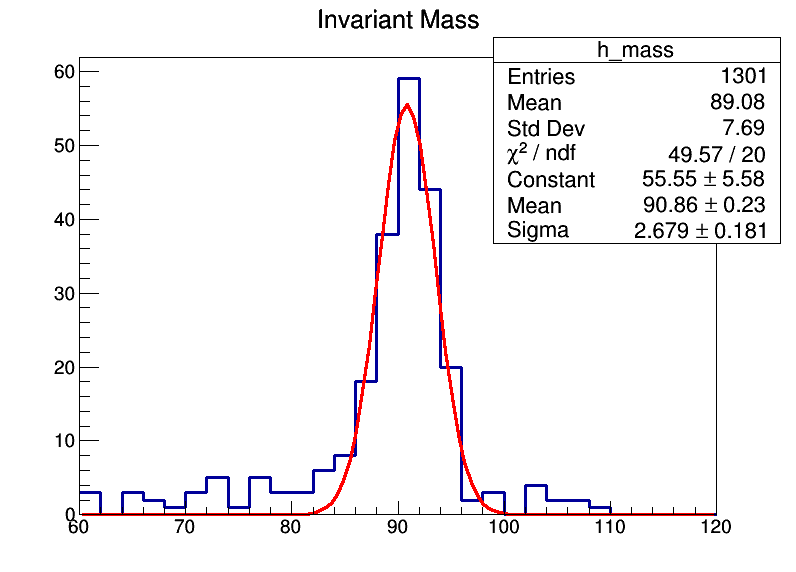

 FCN=49.5698 FROM MIGRAD    STATUS=CONVERGED     102 CALLS         103 TOTAL
                     EDM=4.654e-10    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.55464e+01   5.57596e+00  -3.08140e-03   4.27574e-06
   2  Mean         9.08595e+01   2.25420e-01   1.26713e-04   9.85401e-05
   3  Sigma        2.67855e+00   1.81443e-01  -2.04156e-06  -3.50111e-04


In [3]:
# Get the root file that contains the histograms for selected muons: goodHistos.root.
Gfile = ROOT.TFile("datafiles/goodhistos.root", "read")

### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)

histo6=Gfile.Get('h_mass')

histo6.GetXaxis().SetRangeUser(60, 120)


### One more time, draw the histogram
histo6.SetTitle("Invariant Mass")

histo6.Fit("gaus") #use the standard gauss function. 


#self.fit1 = self.gHisto.GetFunction("gaus")
from ROOT import gStyle
gStyle.SetOptFit()
histo6.Draw()
canvas.Draw()

* ## Breit Wigner

In [4]:
# Breit-Wigner function
def mybw(x, par):
    arg1 = 14.0/22.0 # 2 over pi
    arg2 = par[1]*par[1]*par[2]*par[2] #Gamma=par[1]  M=par[2] 
    arg3 = ((x[0]*x[0]) - (par[2]*par[2]))*((x[0]*x[0]) - (par[2]*par[2]))
    arg4 = x[0]*x[0]*x[0]*x[0]*((par[1]*par[1])/(par[2]*par[2]))
    return par[0]*arg1*arg2/(arg3 + arg4)

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


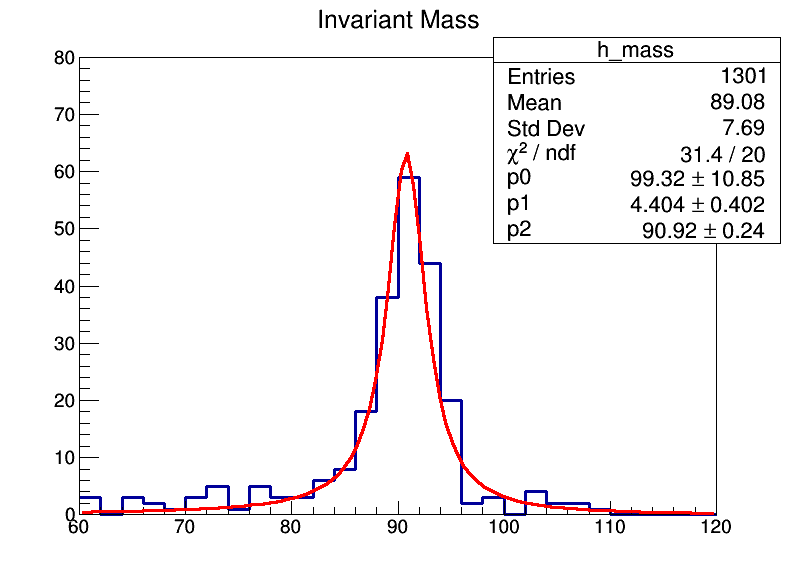

 
 ------ Results from Breit-Wigner Fit ------ 
 
 Chi2:   31.3959680694
 Mean:   90.9169899175  +-  0.244621278815
 RMS:    2.09858252859  +-  0.0958745898781


In [5]:
import math

gHisto=Gfile.Get('h_mass')

### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)
gHisto.Draw()
gHisto.GetXaxis().SetRangeUser(60, 120)
gHisto.GetYaxis().SetRangeUser(0, 80)

division = gHisto.GetNbinsX()
massMIN = gHisto.GetBinLowEdge(1)
massMAX = gHisto.GetBinLowEdge(division+1)
BIN_SIZE = gHisto.GetBinWidth(1)

from ROOT import gStyle, TF1
# Create a TF1 object for calling function mybw 
func = TF1("mybw",mybw,massMIN, massMAX,3)

# Set parameter start values for the function
func.SetParameter(0, 1)
func.SetParameter(2, 5)
func.SetParameter(1, 95)

gHisto.Fit("mybw","QR")

gStyle.SetOptFit()
func.Draw("same")

canvas.Draw()


## Printout fit results

chi2 = func.GetChisquare()
p1 = math.sqrt(func.GetParameter(1))
e1 = func.GetParError(1)
p2 = func.GetParameter(2)
e2 = func.GetParError(2)

print " " 
print " ------ Results from Breit-Wigner Fit ------ "
print " "
print " Chi2:  ",  chi2 
print " Mean:  ",  p2, " +- ", e2 
print " RMS:   ",  p1, " +- ", e1/(2*p1)  
